# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()


   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 399 rows, but it appears that some data is missing

#### Question 2. Create a summary table

In [6]:
#function

In [7]:
df_raw.describe()


/Users/peterlaffey/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the GRE is graded on a much wider scale, GPA only runs from 0 to 4. The data is not normalized yet. 

#### Question 4. Drop data points with missing data


In [8]:
df_drop = df_raw.dropna()
df_drop.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [9]:
df_drop.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We assign the dropped df to a new variable and then check the count - everything matches, and the quartiles no longer throw an error in .describe(). Note that .dropna() does not modify the df in place, it returns the modified dataframe and as such you have to create a new dataframe. 

#### Question 6. Create box plots for GRE and GPA

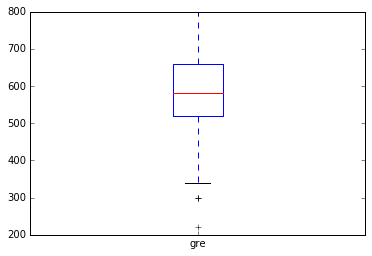

In [10]:
#boxplot 1
df_drop['gre'].plot(kind='box')
#df_drop['gre'].plot(kind='density')

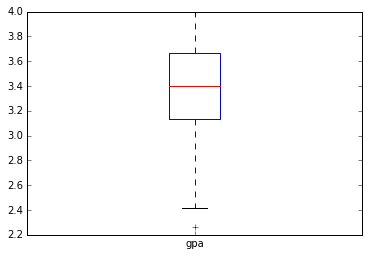

In [11]:
#boxplot 2 
df_drop['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: These boxplots show the spread of data by giving us the quartiles. we can see that for GRE the 25th and 75th percentiles contain almost the same number of observations, but for GPA the 25th percentile contains more observations than the 75th. There also looks to be one outlier in GRE, at the bottom. There are no outliers at the top because the data is bounded there, and enough people obtained perfect scores. 

#### Question 8. Describe each distribution 

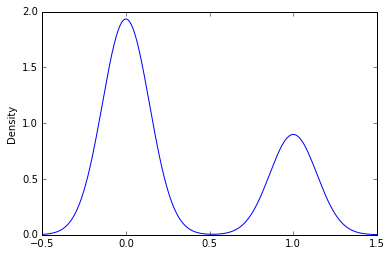

In [12]:
# plot the distribution of each variable 
# Admit density: not the right kind of plot!
df_drop['admit'].plot(kind = 'density')

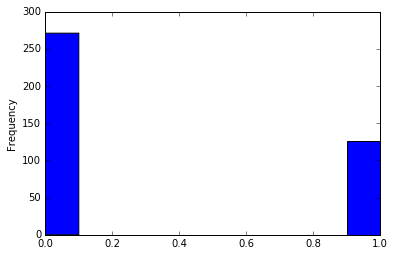

In [13]:
#Admit histogram: admit is our outcome, but it looks like a
#binomial distribution. 
df_drop['admit'].plot(kind='hist')

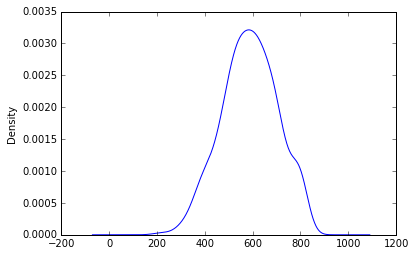

In [14]:
#gre density
df_drop['gre'].plot(kind = 'density')

In [15]:
### the gre data looks fairly normal, with a high kurtosis and a slight positive skew

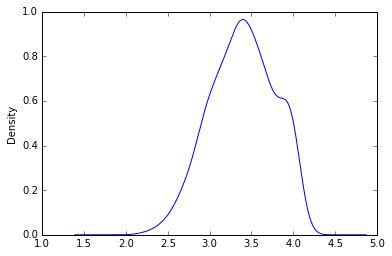

In [16]:
#gpa density
df_drop['gpa'].plot(kind = 'density')

In [17]:
### the gpa data also looks fairly normal, with a high kurtosis and slightly more pronounced 
### positive skew

In [1]:
#prestige histogram - hard to tell what kind of distribution this might be. 
df_drop['prestige'].plot(kind = 'hist')

NameError: name 'df_drop' is not defined

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [21]:
#We need to run some tests:

In [22]:
#test gpa
print sp.stats.normaltest(df_drop['gpa'])

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)


In [23]:
#test gre
print sp.stats.normaltest(df_drop['gre'])

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)


In [24]:
#test prestige
print sp.stats.normaltest(df_drop['prestige'])

NormaltestResult(statistic=49.421253219400995, pvalue=1.8548603556153736e-11)


In [25]:
#test admit
print sp.stats.normaltest(df_drop['admit'])

NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)


Answer: It looks like we can safely assume normality for gpa. However, for gre we cannot assume normality. While the test shows what admit is normal, I would say it is more like a bernoulli distribution since it is a binary variable. We also cannot assume normality for prestige.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. We could transform the gre data in order to make it normal. One way to do this is use the log-likelyhood function. However, the method that is appropriate depends somewhat on the data, to my knowledge. 

#### Question 11. Which of our variables are potentially colinear? 

In [26]:
df_drop.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [27]:
# create a correlation matrix for the data
df_drop.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: It looks like gre, gpa, and admit are all modestly positively correlated. Prestige is negativly correlated with admit, gre, and gpa - which only really makes sense if a prestige of 1 is the best and 4 is the worst.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d455610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2f6a10>]], dtype=object)

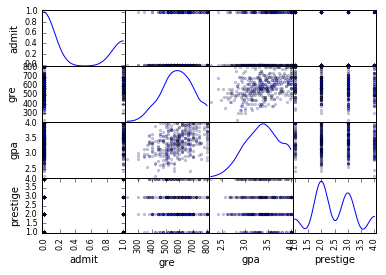

In [28]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_drop, alpha=0.2, diagonal='kde')

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will need the data from the grad schools on all applicants, just like we have now, but the prestige will be from the school the applicant is from, not the school they are applying to. As soon as we have that, we can run a correlation matrix, and that will give us a good idea of the association between grad school admission and the prestige of undergrad schools. 

Note that we will need the data grouped at the school level, so that we can tell the actual admissions rate for each school. 


#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that the higher the prestige of the grad school, the less the prestige of the applicant's school will matter. That is, harvard -> low prestige school will have a high effect, but yale -> harvard will not have a high effect. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [32]:
# here we use interpolation, 
df_interpolate = df_raw.interpolate()
df_interpolate.count()


admit       400
gre         400
gpa         400
prestige    400
dtype: int64

#### 2. Bonus: Log transform the skewed data

In [64]:
# not sure if this is correct because the data does not seemed to be changed 
#very much. 
data_log_gpa = np.log(df_interpolate['gpa'])
data_log_gre = np.log(df_interpolate['gre'])
#cannot take log of admit:
data_admit = df_interpolate['admit']
# not necessary but just to see:
data_log_prestige = np.log(df_interpolate['prestige'])

data = [data_accept, data_log_gpa, data_log_gre, data_log_prestige]

df_transformed = pd.concat(data, axis=1)

df_transformed.head()

,admit,gpa,gre,prestige
0,0,1.283708,5.940171,1.098612
1,1,1.300192,6.492240,1.098612
2,1,1.386294,6.684612,0.000000
3,1,1.160021,6.461468,1.386294
4,0,1.075002,6.253829,1.386294


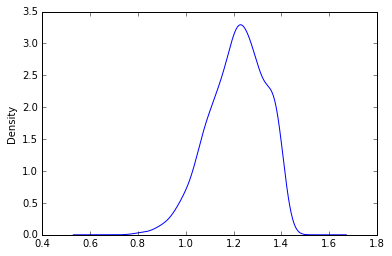

In [58]:
df_transformed['gpa'].plot(kind = 'density')

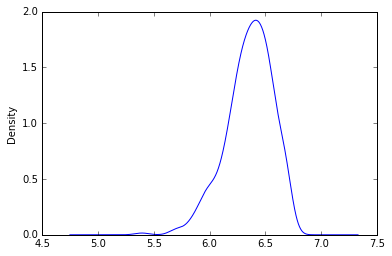

In [59]:
df_transformed['gre'].plot(kind = 'density')

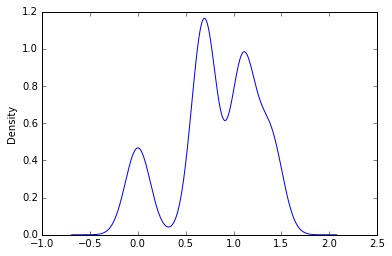

In [65]:
df_transformed['prestige'].plot(kind = 'density')

#### 3. Advanced: Impute missing data



In [61]:
# not sure is this is considered imputation. 
df_fill = df_raw.fillna(method='pad', axis = 1)
df_fill.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

In [63]:
df_fill.tail()

,admit,gre,gpa,prestige
395,0.0,620.0,4.00,2.0
396,0.0,560.0,3.04,3.0
397,0.0,460.0,2.63,2.0
398,0.0,700.0,3.65,2.0
399,0.0,600.0,3.89,3.0
